# 决策树

## 1.导入依赖包和数据集

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

## 2. 查看数据集结构

红酒数据集一共有178个样本，每个样本有13个特征

In [34]:
wine = load_wine()
wine.data.shape

(178, 13)

一共有3种红酒，分别用0，1，2表示

In [3]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

将数据集转化为DataFrame格式，并查看特征名称

In [4]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
# 3. 分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)
Xtrain.shape

(124, 13)

In [7]:
Xtest.shape

(54, 13)

In [8]:
# 4. 建立模型
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)     #返回预测的准确
score

0.9259259259259259

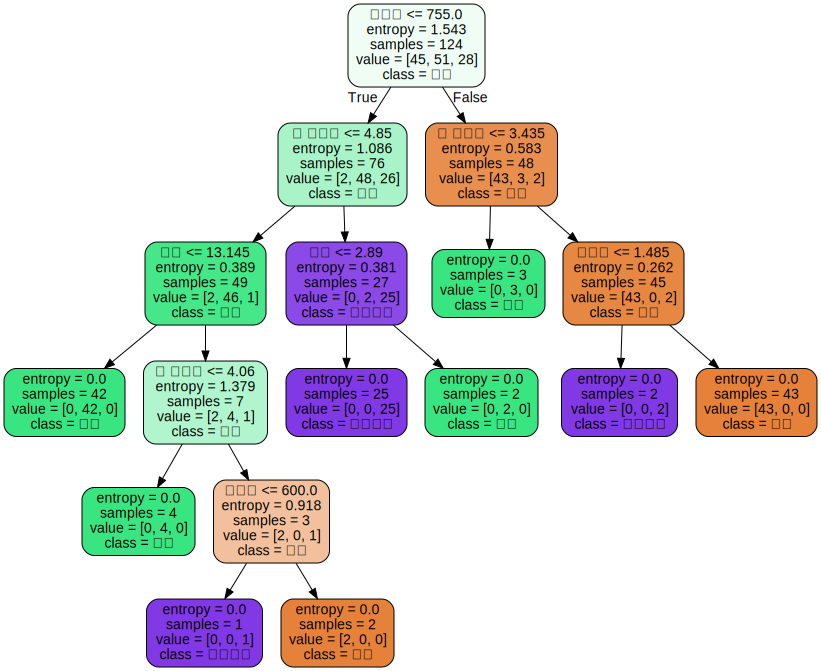

In [10]:
# 5. 画出一棵树
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜 色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
import graphviz
dot_data = tree.export_graphviz(clf
                               ,feature_names=feature_name
                               ,class_names=["琴酒","雪莉","贝尔摩德"] 
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [11]:
# 6. 探索决策树
#特征重要性 
clf.feature_importances_
[*zip(feature_name, clf.feature_importances_)]

[('酒精', 0.04906466244902309),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.053770201069166454),
 ('类黄酮', 0.061708244456564816),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜 色强度', 0.3989646941220301),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.43649219790321553)]

In [12]:
# 在每次分枝时，不从使用全部特征，而是随 机选取一部分特征，从中选取不纯度相关指标最优的作为分枝用的节点。这样，每次生成的树也就不同了。
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=30)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)  #返回预测的准确度
score

0.9074074074074074

In [13]:
# 树一旦建成，我们依然是使用剪枝参数来防止过拟合
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 ,random_state=30
                                 ,splitter='random'
                                 )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9074074074074074

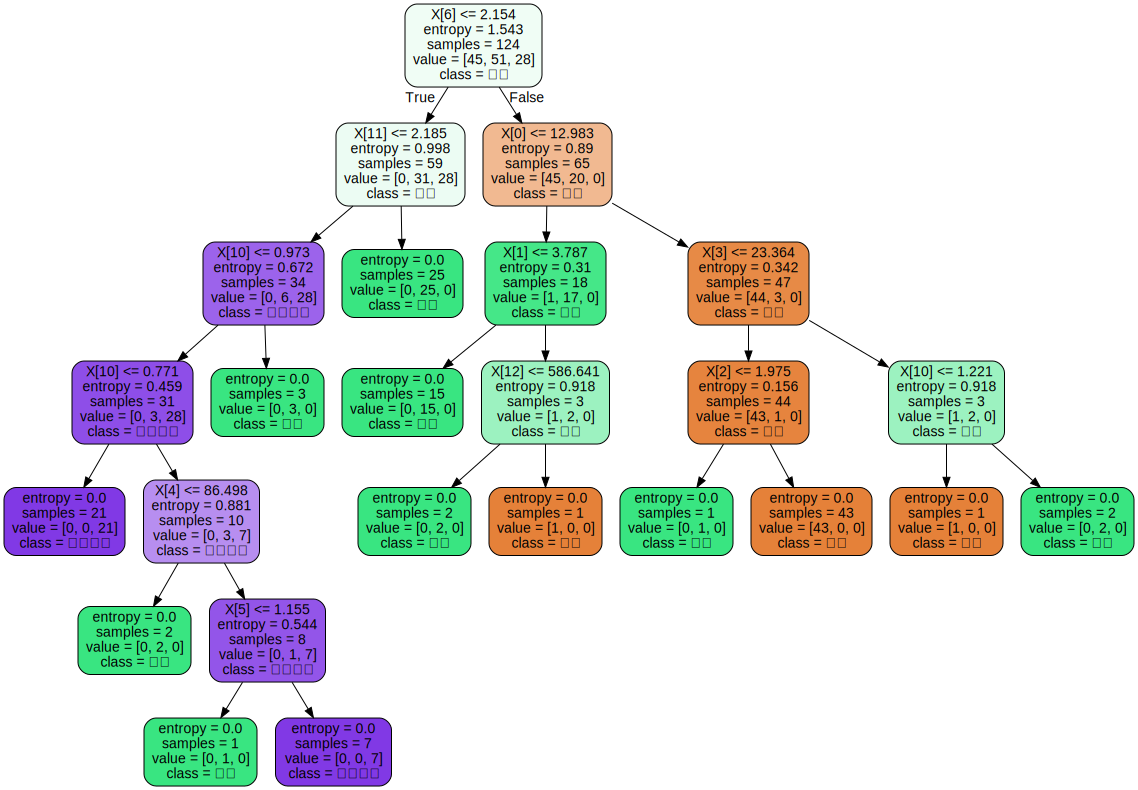

In [14]:
import graphviz
dot_data = tree.export_graphviz(clf
                               ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [15]:
#我们的树对训练集的拟合程度如何？
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

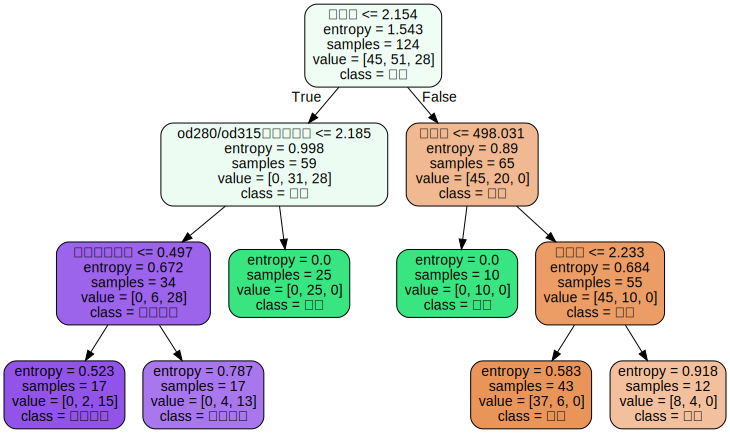

In [16]:
# min_samples_split限定，一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则 分枝就不会发生
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 ,random_state=30
                                 ,splitter='random'
                                 ,max_depth=3
                                 ,min_samples_leaf=10
                                 ,min_samples_split=10
                                 )
clf = clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(clf
                               ,feature_names=feature_name
                               ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [17]:
clf.score(Xtrain,Ytrain)
clf.score(Xtest, Ytest)

0.8888888888888888

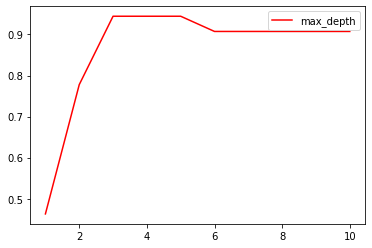

In [18]:
# 确认最优的剪枝参数
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                     ,criterion='entropy'
                                     ,random_state=30
                                     ,splitter='random'
                                     )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11), test, color='red', label='max_depth')
plt.legend()
plt.show()

In [19]:
#apply返回每个测试样本所在的叶子节点的索引
clf.apply(Xtest)

array([11, 11, 11, 21, 21, 21, 21,  4, 21, 21, 10,  4,  9, 14,  4,  4, 21,
        4, 21,  4,  9, 14,  4,  4, 21, 14,  4, 11,  4,  4, 14, 11,  4, 21,
        4, 21, 14,  4, 10, 11,  4, 11, 14, 11, 21,  9, 21, 21, 14, 11, 14,
       14,  4, 11], dtype=int64)

In [20]:
#predict返回每个测试样本的分类/回归结果
clf.predict(Xtest)

array([1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 1,
       2, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       0, 2, 0, 0, 1, 1, 1, 1, 2, 1])

In [21]:
# 1. 导入需要的库
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier

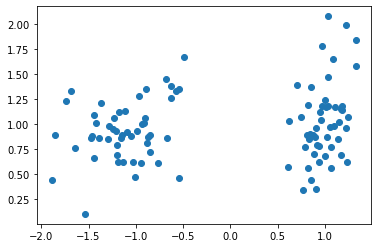

In [22]:
# 2. 生成三种数据集 
# 我们先从sklearn自带的数据库中生成三种类型的数据集：1）月亮型数据，2）环形数据，3）二分型数据
# make_classification库生成随机的二分型数据
X, y = make_classification(n_samples=100   #生成100个样本
                          ,n_features=2    #包含2个特征，即生成二维数据
                          ,n_redundant=0   #添加冗余特征0个 
                          ,n_informative=2    #包含信息的特征是2个 
                          ,random_state=1 #随机模式1 
                          ,n_clusters_per_class=1     #每个簇内包含的标签类别有1个 
                          )
#在这里可以查看一下X和y，其中X是100行带有两个2特征的数据，y是二分类标签 
#也可以画出散点图来观察一下X中特征的分布 
plt.scatter(X[:,0],X[:,1])

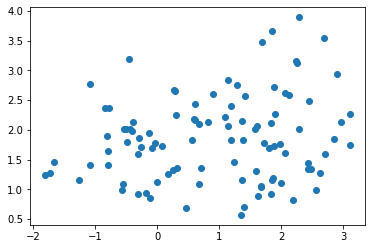

In [23]:
#从图上可以看出，生成的二分型数据的两个簇离彼此很远，这样不利于我们测试分类器的效果，因此我们使用np生成 随机数组，通过让已经生成的二分型数据点加减0~1之间的随机数，使数据分布变得更散更稀疏 #注意，这个过程只能够运行一次，因为多次运行之后X会变得非常稀疏，两个簇的数据会混合在一起，分类器的效应会 继续下降 
rng = np.random.RandomState(2)    #生成一种随机模式 
X += 2 * rng.uniform(size=X.shape)  #加减0~1之间的随机数 
linearly_separable = (X, y)     #生成了新的X，依然可以画散点图来观察一下特征的分布
plt.scatter(X[:,0], X[:,1])

In [24]:
#用make_moons创建月亮型数据，make_circles创建环形数据，并将三组数据打包起来放在列表datasets中 \
datasets = [make_moons(noise=0.3
                      ,random_state=0)
           ,make_circles(noise=0.2
                        ,factor=0.5
                        ,random_state=1)
           ,linearly_separable]

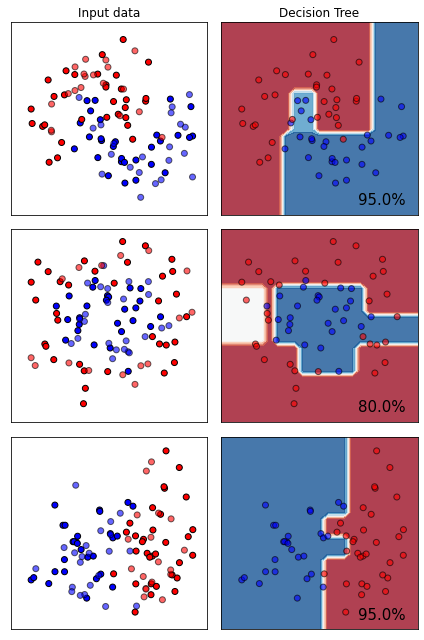

In [25]:
#创建画布，宽高比为6*9 
figure = plt.figure(figsize=(6, 9))
#设置用来安排图像显示位置的全局变量i
i = 1
#开始迭代数据，对datasets中的数据进行for循环
for ds_index, ds in enumerate(datasets):
    #对X中的数据进行标准化处理，然后分训练集和测试集 
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,random_state=42)
    #找出数据集中两个特征的最大值和最小值，让最大值+0.5，最小值-0.5，创造一个比两个特征的区间本身更大 一点的区间
    x1_min, x1_max = X[:,0].min() - .5, X[:,0].max() + .5
    x2_min, x2_max = X[:,1].min() - .5, X[:,1].max() + .5
    #用特征向量生成网格数据，网格数据，其实就相当于坐标轴上无数个点    
    #函数np.arange在给定的两个数之间返回均匀间隔的值，0.2为步长   
    #函数meshgrid用以生成网格数据，能够将两个一维数组生成两个二维矩阵。    
    #如果第一个数组是narray，维度是n，第二个参数是marray，维度是m。那么生成的第一个二维数组是以 narray为行，m行的矩阵，而第二个二维数组是以marray的转置为列，n列的矩阵    
    #生成的网格数据，是用来绘制决策边界的，因为绘制决策边界的函数contourf要求输入的两个特征都必须是二 维的
    array1, array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2)
                                ,np.arange(x2_min, x2_max, 0.2))
    #接下来生成彩色画布    
    #用ListedColormap为画布创建颜色，#FF0000正红，#0000FF正蓝    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    #在画布上加上一个子图，数据为len(datasets)行，2列，放在位置i上
    ax = plt.subplot(len(datasets), 2, i)
    #到这里为止，已经生成了0~1之间的坐标系3个了，接下来为我们的坐标系放上标题    
    #我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件
    if ds_index == 0:
        ax.set_title('Input data')
    #将数据集的分布放到我们的坐标上
    #先放训练集
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train
              ,cmap=cm_bright, edgecolors='k')
    #放测试集
    ax.scatter(X_test[:,0], X_test[:,1], c=y_test,
              cmap=cm_bright, alpha=0.6, edgecolors='k')
    #为图设置坐标轴的最大值和最小值, 并设定没有坐标轴
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    #每次循环之后, 改变i的取值让图每次位列不同的位置
    i += 1
    #至此为止，数据集本身的图像已经布置完毕，运行以上的代码，可以看见三个已经处理好的数据集        
    #############################从这里开始是决策树模型##########################        
    #迭代决策树，首先用subplot增加子图，subplot(行，列，索引)这样的结构，并使用索引i定义图的位置    
    #在这里，len(datasets)其实就是3，2是两列    
    #在函数最开始，我们定义了i=1，并且在上边建立数据集的图像的时候，已经让i+1,所以i在每次循环中的取值 是2，4，6
    ax = plt.subplot(len(datasets), 2, i)
    #决策树的建模过程：实例化 → fit训练 → score接口得到预测的准确率    
    clf = DecisionTreeClassifier(max_depth=5)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    #绘制决策边界，为此，我们将为网格中的每个点指定一种颜色[x1_min，x1_max] x [x2_min，x2_max]    
    #分类树的接口，predict_proba，返回每一个输入的数据点所对应的标签类概率    
    #类概率是数据点所在的叶节点中相同类的样本数量/叶节点中的样本总数量    
    #由于决策树在训练的时候导入的训练集X_train里面包含两个特征，所以我们在计算类概率的时候，也必须导入 结构相同的数组，即是说，必须有两个特征    
    #ravel()能够将一个多维数组转换成一维数组    
    #np.c_是能够将两个数组组合起来的函数    
    #在这里，我们先将两个网格数据降维降维成一维数组，再将两个数组链接变成含有两个特征的数据，再带入决策 树模型，生成的Z包含数据的索引和每个样本点对应的类概率，再切片，且出类概率 
    Z = clf.predict_proba(np.c_[array1.ravel(), array2.ravel()])[:, 1]
    #np.c_[np.array([1,2,3]), np.array([4,5,6])]
    #将返回的类概率作为数据, 放到contourf里面绘制去绘制轮廓
    Z = Z.reshape(array1.shape)
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
    #将数据集放到我们的坐标系上
    #将训练集放到图中去
    ax.scatter(X_train[:, 0], X_train[:, 1]
               ,c=y_train, cmap=cm_bright,edgecolors='k', alpha=0.6)
    #为图设置坐标的最大值和最小值
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    #设定坐标轴不显示标尺也不显示数字
    ax.set_xticks(())
    ax.set_yticks(())
    #我们有三个坐标轴, 但是我们只需要在第一个坐标轴上有标题, 因此设定if ds_index==0这个条件
    if ds_index == 0:
        ax.set_title('Decision Tree')
    #写在右下角的数字
    ax.text(array1.max() - .3, array2.min() + .3, ('{:.1f}%'.format(score*100))
           ,size=15, horizontalalignment='right')
    i += 1
plt.tight_layout()
plt.show()